In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
df=pd.read_csv("placementdata.csv")

In [41]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [43]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [44]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces from all column names
df["StudentID"].duplicated().sum()


np.int64(0)

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["PlacementStatus"]=le.fit_transform(df["PlacementStatus"])
df["ExtracurricularActivities"]=le.fit_transform(df["ExtracurricularActivities"])
df["PlacementTraining"]=le.fit_transform(df["PlacementTraining"])

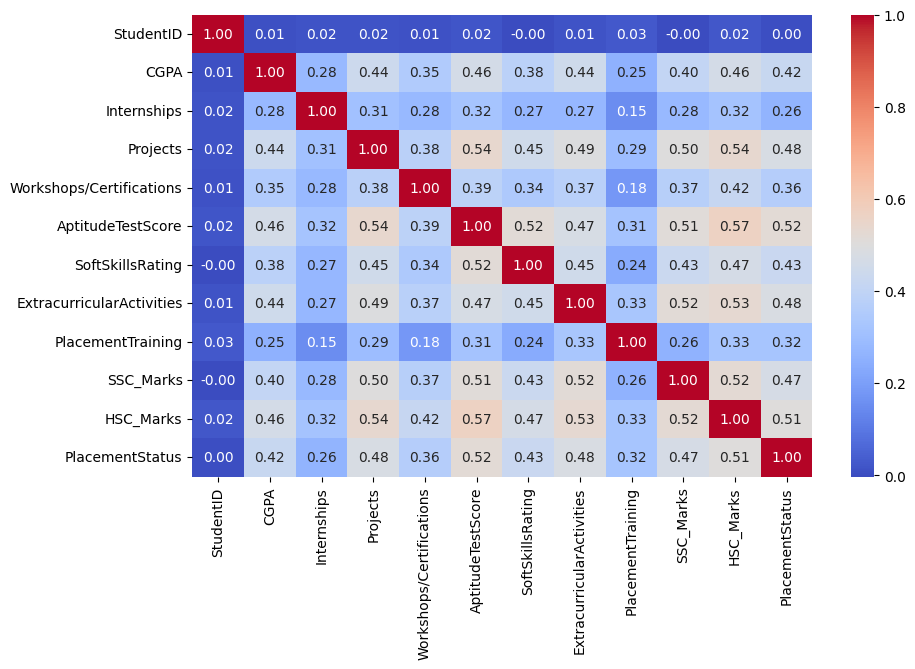

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])  # Only numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [47]:
#average cgpa
df["CGPA"].mean()


np.float64(7.698010000000001)

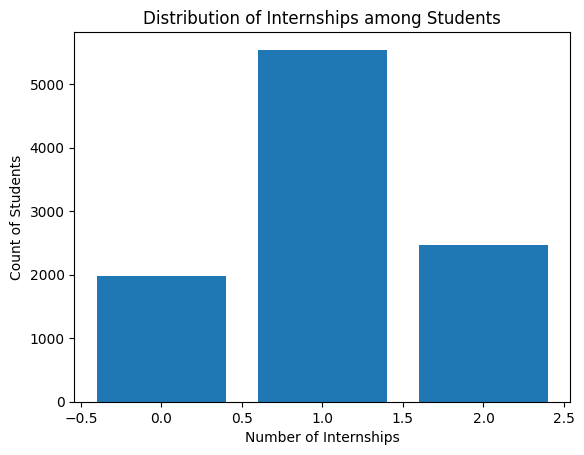

In [48]:
import matplotlib.pyplot as plt

internship_counts = df["Internships"].value_counts()  # Get unique counts
plt.bar(internship_counts.index, internship_counts.values)  # Pass x and y separately

plt.xlabel("Number of Internships")
plt.ylabel("Count of Students")
plt.title("Distribution of Internships among Students")
plt.show()


In [49]:
df["AptitudeTestScore"].min(),df["AptitudeTestScore"].max()

(np.int64(60), np.int64(90))

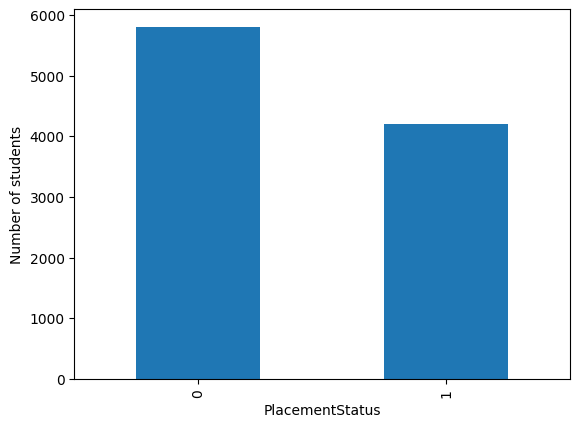

In [50]:
df["PlacementStatus"].value_counts().plot(kind="bar")
plt.ylabel("Number of students")
plt.show()

In [51]:
#average cgpa of students placed vs not placed
df.groupby("PlacementStatus")["CGPA"].mean()

PlacementStatus
0    7.467672
1    8.016488
Name: CGPA, dtype: float64

In [52]:
df["Internships"].corr(df["PlacementStatus"])

np.float64(0.2603396796011866)

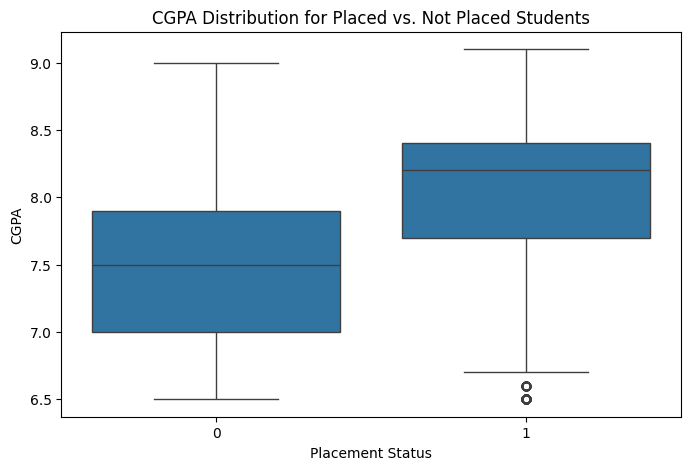

In [53]:
#cgpa vs placements
plt.figure(figsize=(8, 5))  # Adjust figure size
sns.boxplot(x="PlacementStatus", y="CGPA", data=df)

plt.xlabel("Placement Status")
plt.ylabel("CGPA")
plt.title("CGPA Distribution for Placed vs. Not Placed Students")
plt.show()

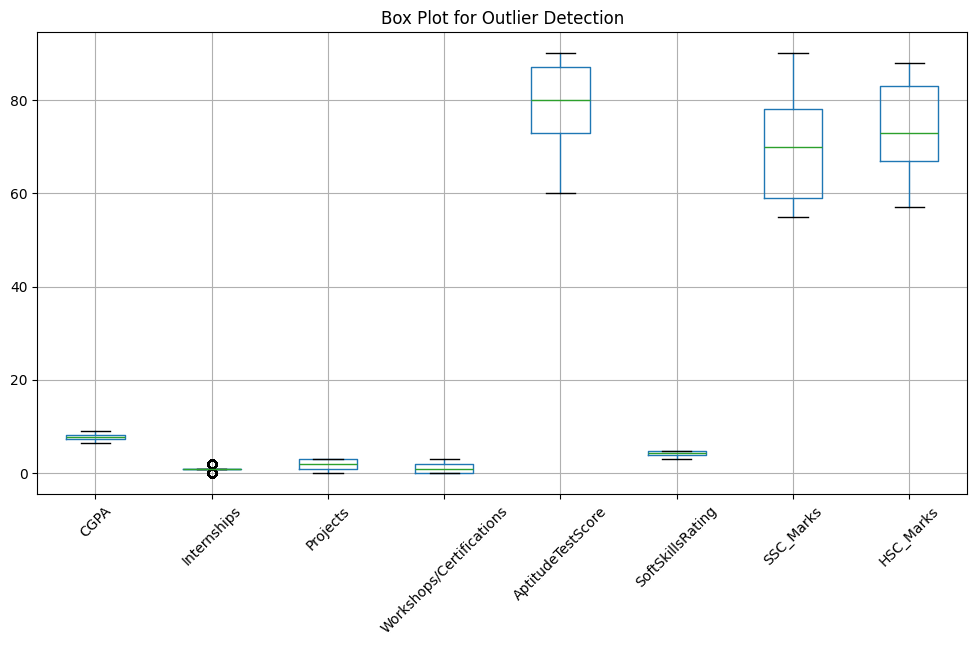

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric columns
numeric_columns = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
                   'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

# Create box plots
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot(rot=45)  # Rotate labels for better readability
plt.title("Box Plot for Outlier Detection")
plt.show()


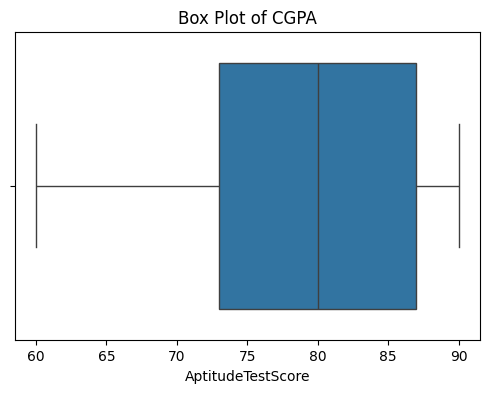

In [55]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["AptitudeTestScore"])
plt.title("Box Plot of CGPA")
plt.show()


In [56]:
from sklearn.cluster import KMeans

# Select only numeric columns for clustering
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Initialize KMeans with number of clusters
km = KMeans(n_clusters=3, random_state=42)

# Fit the model
km.fit(df_numeric)

# Predict clusters and add to DataFrame
df["cluster"] = km.predict(df_numeric)

# View cluster counts
print(df["cluster"].value_counts())


cluster
1    3345
0    3333
2    3322
Name: count, dtype: int64


In [57]:
# 3️⃣ Create New Features
df['TotalMarks'] = df['SSC_Marks'] + df['HSC_Marks'] + df['CGPA'] * 10  # Weighted sum
df['ExperienceLevel'] = df['Internships'] + df['Projects']  # Work Experience Proxy
df['SkillScore'] = df['Workshops/Certifications'] + df['SoftSkillsRating']  # Skill Indicator
df['AptitudeSoftSkill'] = df['AptitudeTestScore'] * df['SoftSkillsRating']  # Interaction term

In [58]:
X=df.drop("PlacementStatus",axis=1)
y=df["PlacementStatus"]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
X_train.shape,X_test.shape

((8000, 16), (2000, 16))

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf=RandomForestClassifier(max_depth=4)

In [63]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.787

In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define meta-model (final model)
meta_model = LogisticRegression()

# Stacking Classifier
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking.fit(X_train, y_train)

# Predictions
y_pred = stacking.predict(X_test)

# Accuracy
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))


Stacking Classifier Accuracy: 0.7885


In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bagging Classifier with Decision Tree
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
                            n_estimators=100,  # Number of base models
                            max_samples=0.8,   # Percentage of data each base model sees
                            max_features=0.8,  # Percentage of features used
                            random_state=42, 
                            n_jobs=-1)  # Use all CPU cores

# Train the model
bagging.fit(X_train, y_train)

# Predictions
y_pred_bagging = bagging.predict(X_test)

# Accuracy
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))

# ------------------------------- #
# Comparison with Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Bagging Classifier Accuracy: 0.7875
Random Forest Accuracy: 0.7875


In [ ]:
accuracy_score(y_test, y_pred_bagging)

In [ ]:
df.columns

In [71]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define base models
rf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
svm = SVC(probability=True, kernel='rbf', C=1.5, random_state=42)

# Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('svm', svm)], 
    voting='soft'  # Use 'hard' for majority class prediction
)

# Train the model
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)

# Accuracy
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))


Voting Classifier Accuracy: 0.7955


In [72]:
import joblib

In [73]:
import joblib

# Save the trained model
joblib.dump(voting_clf, "placement_model.pkl")


['placement_model.pkl']